## Book rental recommedation

In [2]:
#Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
#Reading the datasets
df_book = pd.read_csv('BX-Books.csv',encoding='latin-1')

In [4]:
df_user = pd.read_csv('BX-Users.csv',encoding='latin-1')

In [5]:
df_rating = pd.read_csv('BX-Book-Ratings.csv',encoding='latin-1',nrows=10000)

In [6]:
df_recommendation = pd.read_csv('Recommend.csv',encoding='latin-1')

In [7]:
#1.1_reading the dataset
df_book.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
#1.1
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [9]:
#1.1
df_book.describe()

,isbn,book_title,book_author,year_of_publication,publisher
count,271379,271379,271378,271379,271377
unique,271379,242150,102042,202,16823
top,195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,17145,7535


In [10]:
#1.2
df_user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
#1.2
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [12]:
#1.2
df_user.describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [13]:
#1.3
df_rating.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [14]:
#1.3
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  int64 
 1   isbn     10000 non-null  object
 2   rating   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [15]:
#1.3
df_rating.describe()

,user_id,rating
count,10000.000000,10000.000000
mean,265844.379600,1.974700
std,56937.189618,3.424884
min,2.000000,0.000000
25%,277478.000000,0.000000
50%,278418.000000,0.000000
75%,278418.000000,4.000000
max,278854.000000,10.000000


In [16]:
#1.4
df_recommendation.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [17]:
#1.4
df_recommendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   196        99999 non-null  int64
 1   242        99999 non-null  int64
 2   3          99999 non-null  int64
 3   881250949  99999 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [18]:
#1.4
df_recommendation.describe()

,196,242,3,881250949
count,99999.000000,99999.000000,99999.000000,9.999900e+04
mean,462.487415,425.531965,3.529865,8.835289e+08
std,266.614421,330.799501,1.125678,5.343878e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [19]:
#1.5_Printing the shape of the datasets
print((df_book.shape),(df_user.shape),(df_rating.shape),(df_recommendation.shape))

(271379, 5) (278859, 3) (10000, 3) (99999, 4)


### Cleaning up the null values

In [20]:
#2.1_Cleaning up the null values
df_book.isna().any()

isbn                   False
book_title             False
book_author             True
year_of_publication    False
publisher               True
dtype: bool

In [21]:
#2.1
df_user.isna().any()

user_id     False
Location     True
Age          True
dtype: bool

In [22]:
#2.2_Filling up the null values in books dataset
df_book.fillna('Others')

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [23]:
#2.2_filling up the null values in users dataset
df_user.fillna('0')

,user_id,Location,Age
0,1,"nyc, new york, usa",0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",0
...,...,...,...
278854,278854,"portland, oregon, usa",0
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",0
278857,278857,"knoxville, tennessee, usa",0


In [24]:
#3_merging the dataframes
df_rating = pd.merge(df_rating,df_book,on='isbn')
df_rating.head(10)

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
5,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
6,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion
7,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
8,278418,038550120X,0,A Painted House,JOHN GRISHAM,2001,Doubleday
9,276746,425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group


In [25]:
df_rating.shape

(8701, 7)

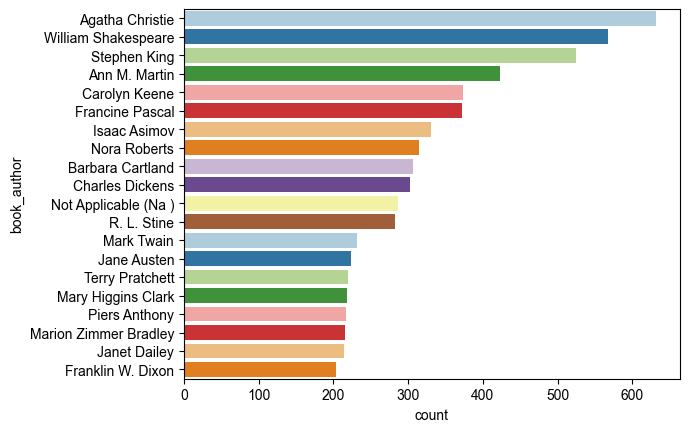

In [56]:
#3.3_data visuvalizations
#3.3.1_Top 20 book authors
sns.countplot(y="book_author",palette = 'Paired', data=df_book,order=df_book['book_author'].value_counts().index[0:20])
sns.set(rc={'figure.figsize':(8,6)})

<Figure size 1000x500 with 0 Axes>

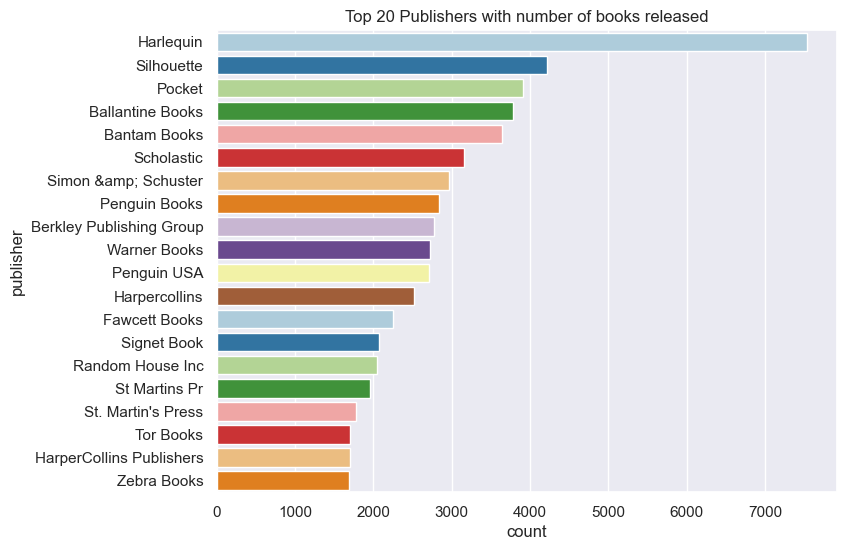

<Figure size 1000x500 with 0 Axes>

In [58]:
#3.3.1_top 20 publishers
sns.countplot(y="publisher",palette = 'Paired', data=df_book,order=df_book['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books released")
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

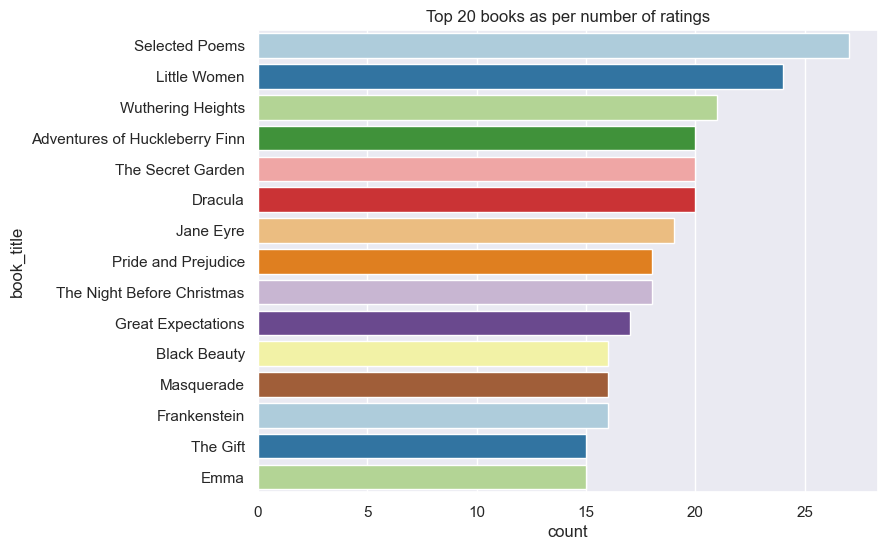

<Figure size 1000x500 with 0 Axes>

In [59]:
#3.3.3
sns.countplot(y="book_title",palette = 'Paired',data= df_book, order=df_book['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")
plt.figure(figsize=(10,5))

In [26]:
#4_Take a quick look at the number of unique users and books
#4.1_counting the unique values and books
n_users=df_rating.user_id.nunique()
n_books=df_rating.isbn.nunique()

In [27]:
#4.2_printing the number of users
print('Number of Users: '+ str(n_users))

Number of Users: 828


In [28]:
#4.3_printing the number of books
print('Number of Books: '+ str(n_books))

Number of Books: 8051


In [29]:
#5_Convert ISBN variables to numeric numbers in the correct order
#5.1_length of ISBN list
isbn_list = df_rating.isbn.unique()
print(" Length of isbn List:", len(isbn_list))
def isbn_numeric(isbn):
    itemindex = np.where(isbn_list==isbn)
    return itemindex[0][0]

 Length of isbn List: 8051


In [30]:
#6_Length of userid list
userid_list = df_rating.user_id.unique()
print(" Length of userid List:", len(userid_list))
def userid_numeric(user_id):
    itemindex = np.where(userid_list==user_id)
    return itemindex[0][0]

 Length of userid List: 828


In [31]:
#7_Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1
df_rating['userid_order'] =df_rating['user_id'].apply(userid_numeric)
df_rating['isbn_order'] = df_rating['isbn'].apply(isbn_numeric)

In [32]:
#_8_Reindex the column to build a matrix
new_column = ['userid_order','isbn_order','rating','book_title','book_author','year_of_publication','publisher']
df_rating = df_rating.reindex(columns=new_column)
df_rating.head(10)

,userid_order,isbn_order,rating,book_title,book_author,year_of_publication,publisher
0,0,0,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,1,1,5,Rites of Passage,Judith Rae,2001,Heinle
2,2,2,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,3,2,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,4,3,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
5,4,4,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
6,5,5,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion
7,6,6,7,A Painted House,JOHN GRISHAM,2001,Doubleday
8,3,6,0,A Painted House,JOHN GRISHAM,2001,Doubleday
9,7,7,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group


In [33]:
#9_Splitting the dataset into two parts testing and training
#9.1_importing model to perform the split
from sklearn.model_selection import train_test_split

In [34]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
#9.2_Spliting the datasets
train_data,test_data=train_test_split(df_rating,test_size=0.25,random_state=30) 

In [36]:
#9.3_checking the shapes of the datasets
print(test_data.shape,train_data.shape)

(2176, 7) (6525, 7)


In [37]:
test_data.head(10)

,userid_order,isbn_order,rating,book_title,book_author,year_of_publication,publisher
3825,138,3237,0,Tempted by Fire,Thea Devine,1995,Zebra Books
60,20,51,0,Ein Liebhaber zuviel ist noch zu wenig.,Gaby Hauptmann,2000,Piper
7570,3,6938,0,Savage Longings (Savage),Cassie Edwards,1997,Leisure Books
4318,3,3706,0,Truck (Picture puffins),Donald Crews,1985,Puffin Books
4129,605,3519,8,Texas Crime Chronicles,Texas Monthly,2000,Warner Books
2950,516,2452,4,Girl With a Pearl Earring,Tracy Chevalier,2003,Plume Books
5671,3,5055,0,Walt Disney's the Sorcerer's Apprentice (Disne...,Disney,1974,Random House Children's Books
6464,3,5840,0,The Jewels of Tessa Kent,Judith Krantz,1999,Bantam Books
3292,548,2757,1,Normal Girl : A Novel,MOLLY JONG-FAST,2001,Villard
3105,411,2594,9,Prague : A Novel,ARTHUR PHILLIPS,2002,Random House


In [38]:
#10_Make predicition based on user and item variables
train_matrix = np.zeros((n_users, n_books))
test_matrix = np.zeros((n_users,n_books))
for line in train_data.itertuples():
    train_matrix[line[1]-1, line[2]-1] = line[3]
for line in test_data.itertuples():
    test_matrix[line[1]-1, line[2]-1] = line[3]

In [39]:
#10.2_Importing pairwise model 
from sklearn.metrics.pairwise import pairwise_distances

In [40]:
#10.3_Checking the cosine similarity
user_similarity = pairwise_distances(train_matrix, metric='cosine')
book_similarity = pairwise_distances(train_matrix.T, metric='cosine')

In [41]:
user_similarity,book_similarity

(array([[0., 1., 1., ..., 1., 1., 1.],
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.]]),
 array([[0., 1., 1., ..., 1., 1., 1.],
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.]]))

In [42]:
user_similarity.shape, book_similarity.shape

((828, 828), (8051, 8051))

In [45]:
#10.6 building a predicition model
def predict(ratings,correlation, type= 'user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        rating_diff = (ratings - mean_user_rating[:,np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + correlation.dot(rating_diff) / np.array([np.abs(correlation).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(correlation) / np.array([np.abs(correlation).sum(axis=1)])
        
    return pred    

In [48]:
book_prediction = predict(train_matrix, book_similarity, type='item')
user_prediction = predict(train_matrix, user_similarity, type='user')

In [49]:
#11_Use RMSE to evaluate the predictions
from sklearn.metrics import mean_squared_error
from math import sqrt

#Defining custom function to filter out elements with ground_truth.nonzero
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [52]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix)))
print('Item-based CF RMSE: ' + str(rmse(book_prediction, test_matrix)))

User-based CF RMSE: 7.725800443853413
Item-based CF RMSE: 7.7251817751053125
